## Xarray
---
- Xarray is an efficient & useful Python package to **read**, **write**, **edit**, and **display** spatial data.

- Xarray organizes gridded, multi-dimensional, large datasets and metadata in a **human friendly format**.

- Xarray simplifies working with multidimensional data in Python, especially for scientific applications like **climate analysis**, **oceanography**, and **atmospheric research**. 

- It builds upon the familiar **NumPy arrays** and adds functionalities for labeled data.  

- Xarray introduces **dimensions**, **coordinates**, and **attributes**, making your data more interpretable, manageable, and ready for advanced analysis.

## Installation

---

### Required dependencies:

- Python (3.9 or later)

- numpy (1.21 or later)

- packaging (21.3 or later)

- pandas (1.4 or later)
---

### Install optional dependencies for handling I/O
`python -m pip install "xarray[io]"` 

### Install optional dependencies for accelerating xarray    
`python -m pip install "xarray[accel]"`  

### Install optional dependencies for dask arrays
`python -m pip install "xarray[parallel]"` 

### Install optional dependencies for visualization
`python -m pip install "xarray[viz]"`       

`python -m pip install "xarray[complete]"`  

---

### To install xarray using the conda command line tool

`conda install -c conda-forge xarray dask netCDF4 bottleneck`

Guide: https://docs.xarray.dev/en/stable/getting-started-guide/installing.html

## Import Xarray package

In [211]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER


import wget

import zipfile
import regionmask
import geopandas as gpd

import warnings
warnings.filterwarnings("ignore")

## Reading Netcdf file

In [212]:
# Here we’ll use air temperature from the National Center for Environmental Prediction.
# ds = xr.open_dataset("")              

ds = xr.tutorial.load_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Accessing the data

In [213]:
# Print the dimensions of the dataset
ds.dims

FrozenMappingWarningOnValuesAccess({'lat': 25, 'time': 2920, 'lon': 53})

In [214]:
# Print the coordinates of the dataset
ds.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

In [215]:
# Print the data variables of the dataset
ds.data_vars

Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7

In [216]:
# Print the attributes of the dataset
ds.attrs

{'Conventions': 'COARDS',
 'title': '4x daily NMC reanalysis (1948)',
 'description': 'Data is from NMC initialized reanalysis\n(4x/day).  These are the 0.9950 sigma level values.',
 'platform': 'Model',
 'references': 'http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanalysis.html'}

## Access Individual Variable

In [217]:
# Individual variable can be accessed using it's name
air_temp = ds['air']
# air_temp = ds.air
air_temp

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
...
        ...,
        [294.79, 295.29, 297.49, ..., 295.49, 295.39, 294.69],
        [296.79, 297.89, 298.29, ..., 295.49, 295.49, 294.79],
        [298.19, 299.19, 298.79, ..., 296.09, 295.79, 295.79]],

       [[245.79, 244.79, 243.49, ..., 243.29, 243.99, 244.79],
        [249.89, 249.29, 248.49, ..., 241.29, 242.49, 244.29],
        [262.39, 261.79, 261.29, ..., 240.49, 243.09, 246.89],
        ...,
        [293.69, 293.89, 295.39, ..., 295.09, 294.69, 294.29],
        [296.29, 297.19, 297.59, ..., 295.29, 295.09, 294.39],
        [297.79, 298.39, 298.49, ..., 295.69, 295.49, 295.19]],

       [[245.09, 244.29, 243.29, ..., 241.69, 241.49, 241.79],
        [249.89, 249.29, 248.39, ..., 239.59, 240.29, 241.69],
        [262.99, 262.19, 261.39, ..., 239.89, 242.59, 246.29],
        ...,
        [293.79, 293.69, 295.09, ..., 295.29, 295.09, 294.69],
        [296.09, 296.89, 297.19, ..., 295.69, 295.69, 295.19],
        [297.69, 298.09, 298.09, ..., 296.49, 296.19, 295.69]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [218]:
# Print the shape of the variable
air_temp.shape

(2920, 25, 53)

In [219]:
# Print the dimensions of the variable
air_temp.dims

('time', 'lat', 'lon')

In [220]:
# Print the coordinates of the variable
air_temp.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

### Get the array values

In [221]:
air_temp.values

array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
        [295

In [222]:
# Get the attributes of the variable
air_temp.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

## Print Coordinates

In [223]:
# Print the latitude values
air_temp.lat

# Print the longitude values
air_temp.lon

# Print the time values
air_temp.time

<xarray.DataArray 'time' (time: 2920)> Size: 23kB
array(['2013-01-01T00:00:00.000000000', '2013-01-01T06:00:00.000000000',
       '2013-01-01T12:00:00.000000000', ..., '2014-12-31T06:00:00.000000000',
       '2014-12-31T12:00:00.000000000', '2014-12-31T18:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    standard_name:  time
    long_name:      Time

## Get the values

In [224]:
# Get the values of the coordinate
air_temp.lat.values
air_temp.lon.values
# air_temp.time.values

array([200. , 202.5, 205. , 207.5, 210. , 212.5, 215. , 217.5, 220. ,
       222.5, 225. , 227.5, 230. , 232.5, 235. , 237.5, 240. , 242.5,
       245. , 247.5, 250. , 252.5, 255. , 257.5, 260. , 262.5, 265. ,
       267.5, 270. , 272.5, 275. , 277.5, 280. , 282.5, 285. , 287.5,
       290. , 292.5, 295. , 297.5, 300. , 302.5, 305. , 307.5, 310. ,
       312.5, 315. , 317.5, 320. , 322.5, 325. , 327.5, 330. ],
      dtype=float32)

## Subsetting a dataset by time and space

In [225]:
# Print the first values of the variable
air_temp1 = air_temp[0,:,:]

# Print the values of the variable at the first time step (isel)
# air_temp11 = air_temp.isel(time=0)
air_temp1

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
array([[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
       [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
       [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
       ...,
       [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
       [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
       [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Select Specific Region

In [226]:
# Print the values of the variable at the first time step (sel)
air_sub = air_temp.sel(lat=slice(60,20),lon=slice(250,300))
air_sub

<xarray.DataArray 'air' (time: 2920, lat: 17, lon: 21)> Size: 8MB
array([[[256.2 , 251.2 , 248.7 , ..., 265.1 , 266.79, 268.5 ],
        [261.9 , 255.3 , 251.89, ..., 263.79, 266.79, 268.9 ],
        [267.1 , 258.9 , 253.89, ..., 261.29, 264.79, 267.6 ],
        ...,
        [290.9 , 287.7 , 284.4 , ..., 294.4 , 294.7 , 295.  ],
        [294.  , 295.4 , 290.  , ..., 296.6 , 296.79, 296.7 ],
        [295.5 , 298.79, 296.4 , ..., 297.9 , 298.  , 298.1 ]],

       [[261.6 , 254.89, 249.6 , ..., 262.7 , 265.9 , 268.7 ],
        [266.29, 258.1 , 251.39, ..., 260.9 , 265.1 , 268.29],
        [269.2 , 261.6 , 255.3 , ..., 258.2 , 262.1 , 265.6 ],
        ...,
        [291.2 , 287.9 , 282.7 , ..., 294.  , 294.2 , 294.4 ],
        [295.1 , 294.9 , 288.  , ..., 296.9 , 297.1 , 296.79],
        [296.  , 297.79, 294.4 , ..., 298.4 , 298.  , 297.79]],

       [[262.2 , 257.9 , 252.5 , ..., 262.4 , 266.6 , 270.2 ],
        [269.9 , 264.5 , 257.2 , ..., 260.7 , 265.9 , 270.1 ],
        [274.  , 269.9 , 263.4 , ..., 257.5 , 261.79, 266.  ],
        ...,
...
        ...,
        [295.19, 294.69, 288.39, ..., 297.59, 297.39, 297.29],
        [296.39, 298.29, 293.49, ..., 298.09, 297.89, 297.79],
        [296.29, 297.39, 295.79, ..., 298.89, 298.79, 298.69]],

       [[263.59, 261.99, 260.19, ..., 246.59, 250.79, 257.29],
        [265.19, 263.49, 261.59, ..., 245.29, 249.49, 256.19],
        [267.49, 263.99, 261.49, ..., 241.29, 242.89, 248.69],
        ...,
        [295.19, 293.99, 285.89, ..., 297.79, 297.69, 297.79],
        [297.39, 297.89, 288.09, ..., 297.89, 297.89, 297.99],
        [296.99, 297.89, 292.39, ..., 299.19, 298.99, 298.69]],

       [[259.29, 257.19, 255.59, ..., 245.99, 250.09, 256.09],
        [264.99, 262.99, 261.59, ..., 245.59, 248.89, 254.79],
        [268.09, 265.99, 264.39, ..., 242.49, 243.09, 247.89],
        ...,
        [294.59, 295.19, 292.59, ..., 297.89, 297.89, 297.99],
        [296.29, 298.99, 297.29, ..., 298.89, 298.89, 298.59],
        [296.09, 298.59, 299.29, ..., 300.79, 300.59, 299.89]]])
Coordinates:
  * lat      (lat) float32 68B 60.0 57.5 55.0 52.5 50.0 ... 27.5 25.0 22.5 20.0
  * lon      (lon) float32 84B 250.0 252.5 255.0 257.5 ... 295.0 297.5 300.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Slice the time dimension

In [227]:
# Slice the time dimension (3 months)
air_sub_3mon = air_temp.sel(time=slice('2013-01-01','2013-03-31'), lat=slice(60,20),lon=slice(250,300))
air_sub_3mon

<xarray.DataArray 'air' (time: 360, lat: 17, lon: 21)> Size: 1MB
array([[[256.2 , 251.2 , 248.7 , ..., 265.1 , 266.79, 268.5 ],
        [261.9 , 255.3 , 251.89, ..., 263.79, 266.79, 268.9 ],
        [267.1 , 258.9 , 253.89, ..., 261.29, 264.79, 267.6 ],
        ...,
        [290.9 , 287.7 , 284.4 , ..., 294.4 , 294.7 , 295.  ],
        [294.  , 295.4 , 290.  , ..., 296.6 , 296.79, 296.7 ],
        [295.5 , 298.79, 296.4 , ..., 297.9 , 298.  , 298.1 ]],

       [[261.6 , 254.89, 249.6 , ..., 262.7 , 265.9 , 268.7 ],
        [266.29, 258.1 , 251.39, ..., 260.9 , 265.1 , 268.29],
        [269.2 , 261.6 , 255.3 , ..., 258.2 , 262.1 , 265.6 ],
        ...,
        [291.2 , 287.9 , 282.7 , ..., 294.  , 294.2 , 294.4 ],
        [295.1 , 294.9 , 288.  , ..., 296.9 , 297.1 , 296.79],
        [296.  , 297.79, 294.4 , ..., 298.4 , 298.  , 297.79]],

       [[262.2 , 257.9 , 252.5 , ..., 262.4 , 266.6 , 270.2 ],
        [269.9 , 264.5 , 257.2 , ..., 260.7 , 265.9 , 270.1 ],
        [274.  , 269.9 , 263.4 , ..., 257.5 , 261.79, 266.  ],
        ...,
...
        ...,
        [295.1 , 296.  , 295.29, ..., 292.79, 293.4 , 293.79],
        [296.2 , 298.6 , 297.4 , ..., 295.5 , 295.79, 295.7 ],
        [296.  , 297.29, 297.6 , ..., 297.29, 297.1 , 297.4 ]],

       [[256.9 , 254.2 , 253.39, ..., 263.29, 262.9 , 265.5 ],
        [261.2 , 258.1 , 255.8 , ..., 262.  , 261.4 , 265.  ],
        [266.5 , 261.7 , 258.2 , ..., 258.2 , 256.9 , 261.1 ],
        ...,
        [294.4 , 295.2 , 291.1 , ..., 293.7 , 294.2 , 294.5 ],
        [296.29, 299.4 , 294.79, ..., 296.29, 296.6 , 296.9 ],
        [296.  , 298.  , 295.79, ..., 297.79, 297.5 , 298.1 ]],

       [[261.29, 259.5 , 258.6 , ..., 270.29, 269.2 , 269.1 ],
        [264.2 , 261.7 , 260.4 , ..., 271.79, 271.5 , 271.4 ],
        [268.5 , 264.7 , 262.  , ..., 270.79, 271.4 , 271.9 ],
        ...,
        [300.1 , 303.  , 300.1 , ..., 294.5 , 295.1 , 295.1 ],
        [296.6 , 303.29, 304.1 , ..., 296.79, 297.  , 297.  ],
        [295.9 , 299.  , 302.2 , ..., 298.4 , 298.2 , 298.2 ]]])
Coordinates:
  * lat      (lat) float32 68B 60.0 57.5 55.0 52.5 50.0 ... 27.5 25.0 22.5 20.0
  * lon      (lon) float32 84B 250.0 252.5 255.0 257.5 ... 295.0 297.5 300.0
  * time     (time) datetime64[ns] 3kB 2013-01-01 ... 2013-03-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [228]:
# Print the values of the variable at the first time step (sel)
air_sub_t111 = air_temp.sel(time='2013-01-01T00', lat=slice(60,20),lon=slice(250,300))
# air_sub_t112 = air_temp.sel(time='2013-01-01T12', lat=slice(60,20),lon=slice(250,300))

air_sub_t111

<xarray.DataArray 'air' (lat: 17, lon: 21)> Size: 3kB
array([[256.2 , 251.2 , 248.7 , 248.  , 247.7 , 247.1 , 246.39, 246.2 ,
        246.8 , 248.3 , 250.6 , 252.7 , 253.39, 252.89, 252.5 , 254.3 ,
        258.1 , 262.29, 265.1 , 266.79, 268.5 ],
       [261.9 , 255.3 , 251.89, 251.5 , 251.89, 251.8 , 251.39, 250.7 ,
        249.5 , 248.2 , 248.5 , 250.8 , 253.1 , 253.6 , 252.7 , 253.  ,
        255.8 , 259.9 , 263.79, 266.79, 268.9 ],
       [267.1 , 258.9 , 253.89, 253.  , 253.5 , 253.3 , 252.6 , 252.  ,
        250.8 , 249.3 , 249.5 , 252.1 , 254.3 , 253.39, 251.  , 250.6 ,
        253.3 , 257.5 , 261.29, 264.79, 267.6 ],
       [269.5 , 262.7 , 256.9 , 254.3 , 253.3 , 251.89, 250.3 , 249.6 ,
        249.39, 249.  , 250.  , 253.39, 256.6 , 256.3 , 253.1 , 251.1 ,
        252.6 , 256.3 , 260.2 , 263.6 , 266.2 ],
       [269.79, 267.9 , 263.  , 258.1 , 254.6 , 251.8 , 249.6 , 249.89,
        252.3 , 254.  , 254.3 , 255.89, 260.  , 263.  , 261.5 , 257.29,
        255.5 , 258.29, 264.  , 268.7 , 270.5 ],
       [265.79, 267.9 , 266.  , 261.7 , 258.5 , 256.2 , 253.89, 253.8 ,
        257.6 , 261.79, 262.6 , 262.5 , 265.29, 268.9 , 267.9 , 262.5 ,
        258.1 , 258.9 , 264.5 , 270.2 , 272.7 ],
       [260.1 , 264.4 , 266.9 , 265.7 , 263.4 , 261.  , 257.9 , 256.5 ,
        259.6 , 265.  , 268.2 , 269.5 , 271.2 , 271.79, 269.9 , 267.  ,
...
        277.5 , 278.9 , 279.  , 279.  , 280.29, 282.6 , 285.2 , 287.5 ,
        289.  , 289.9 , 289.9 , 289.  , 288.1 ],
       [275.2 , 273.6 , 278.  , 282.1 , 284.6 , 286.79, 285.79, 283.1 ,
        283.  , 283.7 , 283.1 , 283.79, 286.6 , 288.4 , 288.79, 288.79,
        288.9 , 289.4 , 290.  , 290.29, 290.4 ],
       [281.5 , 278.6 , 282.29, 286.79, 288.  , 289.  , 289.6 , 288.7 ,
        288.5 , 288.7 , 287.7 , 288.29, 290.5 , 291.1 , 290.29, 289.9 ,
        290.29, 290.7 , 290.9 , 291.2 , 291.5 ],
       [286.79, 281.79, 283.5 , 290.4 , 293.7 , 292.9 , 293.  , 293.79,
        293.7 , 293.  , 291.7 , 291.29, 292.29, 292.9 , 292.4 , 291.7 ,
        291.9 , 292.29, 292.2 , 292.2 , 292.79],
       [290.9 , 287.7 , 284.4 , 288.5 , 295.1 , 296.4 , 295.4 , 295.29,
        295.29, 295.5 , 295.29, 294.9 , 294.5 , 294.5 , 294.7 , 294.29,
        293.79, 294.  , 294.4 , 294.7 , 295.  ],
       [294.  , 295.4 , 290.  , 287.4 , 292.  , 295.6 , 296.79, 296.7 ,
        296.2 , 296.6 , 296.9 , 297.2 , 296.4 , 295.5 , 295.79, 295.9 ,
        296.  , 296.4 , 296.6 , 296.79, 296.7 ],
       [295.5 , 298.79, 296.4 , 292.1 , 290.79, 292.5 , 297.6 , 299.2 ,
        297.4 , 297.6 , 297.9 , 298.2 , 298.1 , 297.79, 298.1 , 297.1 ,
        297.1 , 298.  , 297.9 , 298.  , 298.1 ]])
Coordinates:
  * lat      (lat) float32 68B 60.0 57.5 55.0 52.5 50.0 ... 27.5 25.0 22.5 20.0
  * lon      (lon) float32 84B 250.0 252.5 255.0 257.5 ... 295.0 297.5 300.0
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Extracting single coordinate

In [229]:
#  when using `sel` method it must either correspond to an `exact value` or the method argument must be used
#air_point1 = air_temp.sel(lat=50., lon=260.)
air_point1 = air_temp.sel(lat=50., lon=260., method='nearest')

air_point1

<xarray.DataArray 'air' (time: 2920)> Size: 23kB
array([254.6 , 252.89, 256.  , ..., 258.69, 260.39, 261.49])
Coordinates:
    lat      float32 4B 50.0
    lon      float32 4B 260.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Plotting with xarray

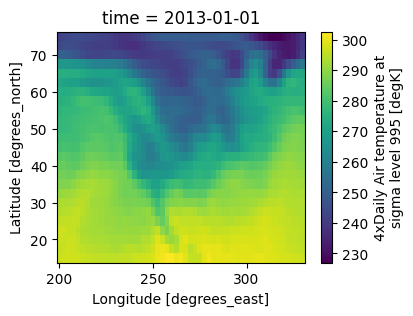

In [230]:
# Plot the first time step
air_temp.isel(time=0).plot(size=3)
# air_temp[0,:,:].plot(size =3)

## Contour, Filled Contour, and Color Mesh

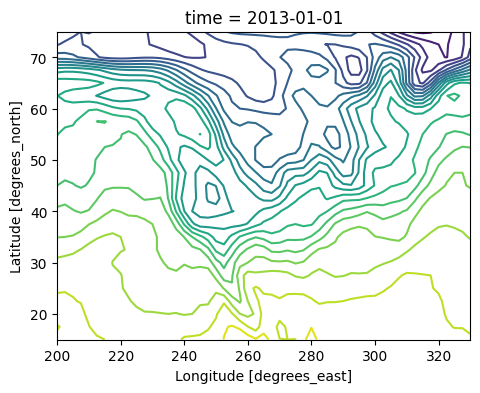

In [231]:
# air_temp[0,:,:].plot.contourf(size=4, levels=20)
# air_temp[0,:,:].plot.pcolormesh(size=4, levels=20)
air_temp[0,:,:].plot.contour(size=4, levels=20)


## Calling Matplotlib functionality

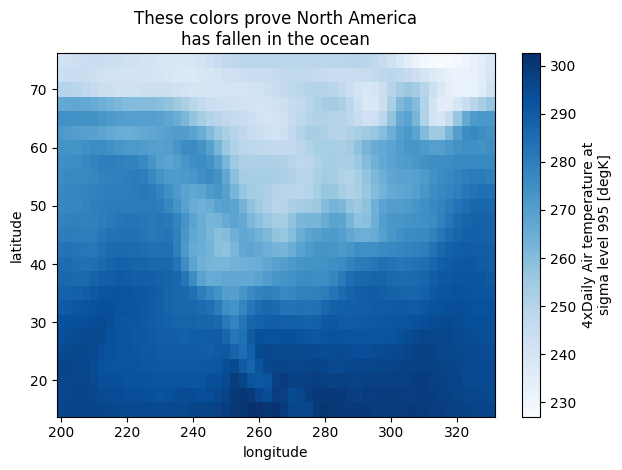

In [232]:
air_temp[0,:,:].plot(cmap=plt.cm.Blues)
# matplt lib functinality can be used to customize the plot
plt.title("These colors prove North America\nhas fallen in the ocean")
plt.ylabel("latitude")
plt.xlabel("longitude")
plt.tight_layout()
plt.draw()

## Climatology

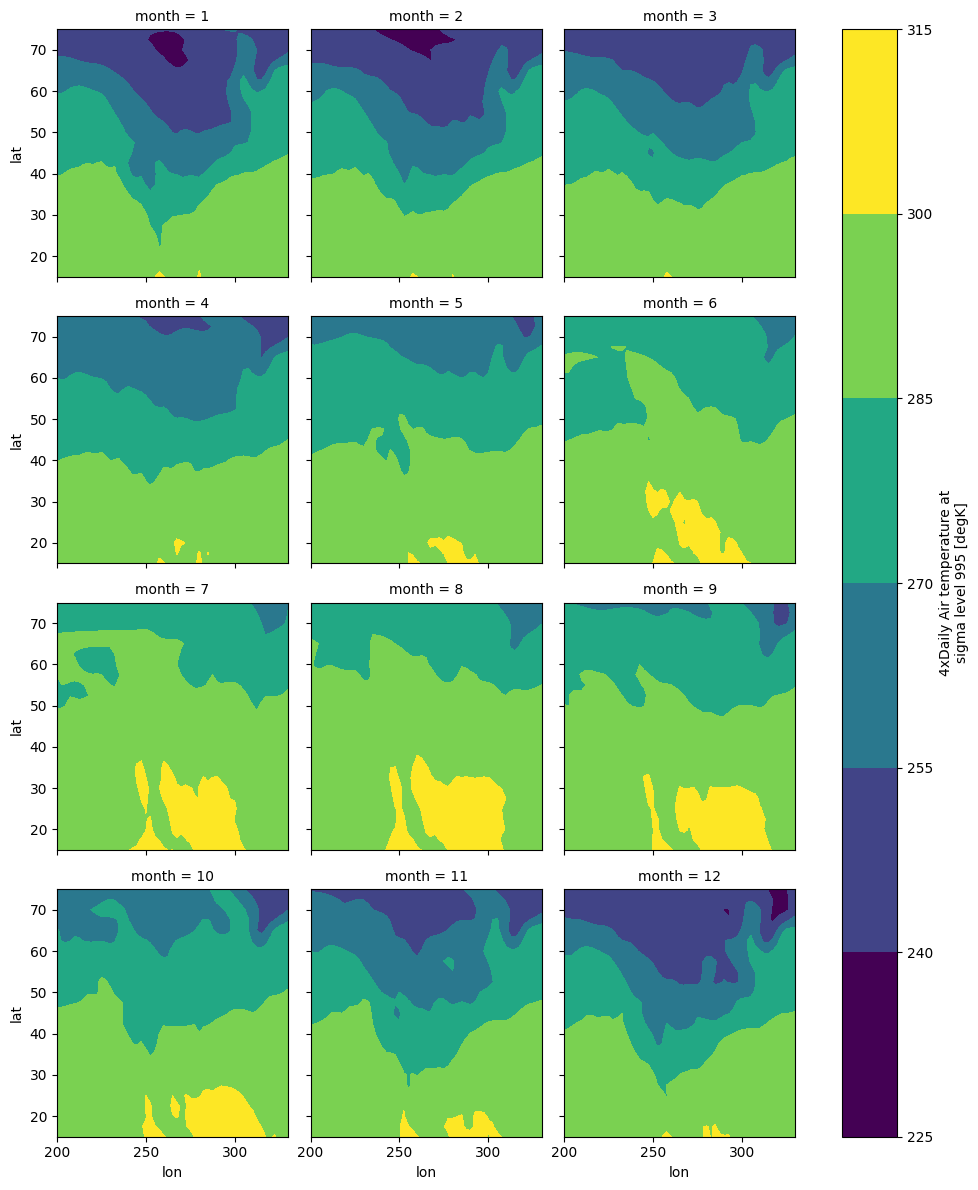

In [233]:
# Compute the mean of the variable over the month
air_temp.groupby('time.month').mean(dim='time').plot.contourf(col='month', col_wrap=3, size=3)

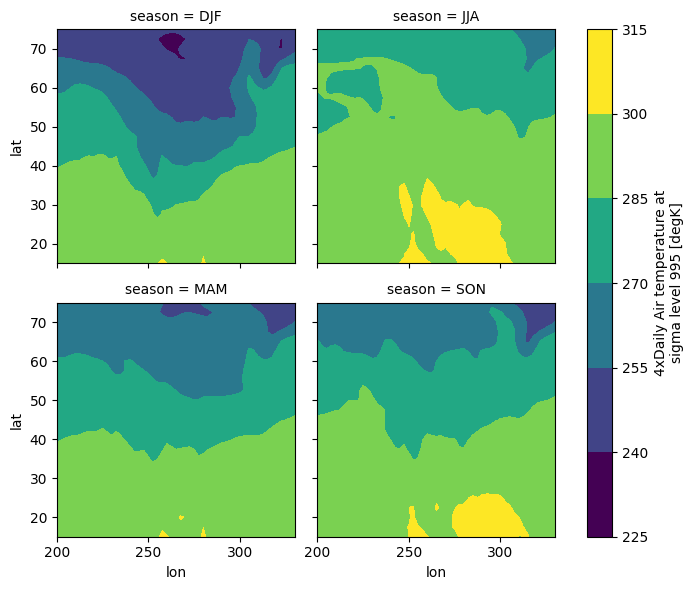

In [234]:
# Compute the mean of the variable over the season
air_temp.groupby('time.season').mean(dim='time').plot.contourf(col='season', col_wrap=2)

### More on Climatology

In [235]:
# East Africa Rainfall data for the period 1981-2014 from the Norwegian ESM Mode
ds_ref_nor = xr.open_dataset("Pr_Nor_His_EA.nc")
# ds_ref_nor

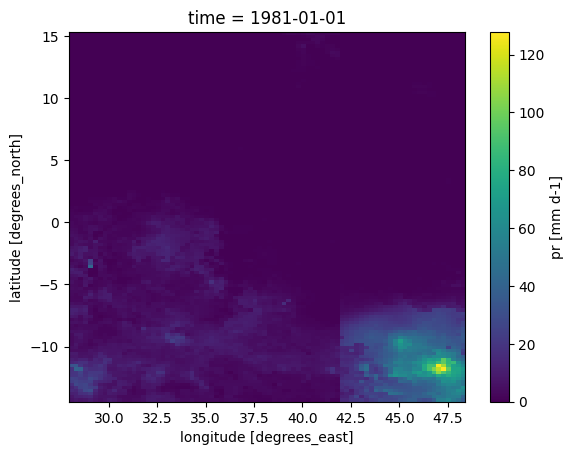

In [236]:
ds_ref_nor.pr[0,:,:].plot()

### Calculate monthly rainfall over East Africa

In [237]:
# Calculate monthly mean of the variable 
# Group the data by month and calculate the sum of the values
pr_monthly_mean = ds_ref_nor['pr'].resample(time='1ME').sum()
pr_monthly_mean

<xarray.DataArray 'pr' (time: 408, lat: 119, lon: 82)> Size: 16MB
array([[[3.55381134e+02, 3.55541260e+02, 3.56360626e+02, ...,
         4.33395599e+02, 4.32857391e+02, 4.10837067e+02],
        [3.61219940e+02, 3.66062653e+02, 3.62262878e+02, ...,
         3.91609955e+02, 4.47640198e+02, 3.94112335e+02],
        [3.75134705e+02, 3.84179749e+02, 3.83566010e+02, ...,
         3.99423584e+02, 4.63000458e+02, 4.59016510e+02],
        ...,
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.29281938e+00, 1.70450294e+00, 1.71752954e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.52755785e+00, 1.40276468e+00, 1.49000669e+00],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         9.31175351e-01, 5.75651050e-01, 5.65391600e-01]],

       [[1.81319794e+02, 1.81513428e+02, 1.79290863e+02, ...,
         5.80191589e+02, 5.55662476e+02, 5.37394531e+02],
        [1.72308365e+02, 1.71223633e+02, 1.74715759e+02, ...,
         5.41021851e+02, 5.67825378e+02, 5.25801880e+02],
        [1.60613647e+02, 1.65160172e+02, 1.69238159e+02, ...,
         5.07076569e+02, 5.78939026e+02, 6.25903137e+02],
...
        [2.57759035e-01, 8.65064442e-01, 2.53360939e+00, ...,
         2.93252850e+00, 4.32346296e+00, 5.08883810e+00],
        [1.44126592e-02, 1.98150966e-02, 3.24429661e-01, ...,
         1.93697751e+00, 1.56539774e+00, 1.64367139e+00],
        [5.30153140e-02, 3.87082472e-02, 4.15072769e-01, ...,
         5.03897667e-01, 2.29961470e-01, 1.95363998e-01]],

       [[1.98102524e+02, 2.01325821e+02, 2.02749298e+02, ...,
         6.66800156e+01, 6.42026138e+01, 6.12122803e+01],
        [2.03266174e+02, 2.11035950e+02, 2.14494827e+02, ...,
         4.61218796e+01, 6.19905052e+01, 5.03803024e+01],
        [2.09858627e+02, 2.16281570e+02, 2.21210495e+02, ...,
         4.02373390e+01, 5.12016106e+01, 4.68829155e+01],
        ...,
        [1.19662009e-01, 1.01725183e-01, 8.16523135e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [3.94058377e-02, 8.04199949e-02, 7.38364011e-02, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
        [1.57623030e-02, 4.21475351e-01, 4.59565610e-01, ...,
         0.00000000e+00, 0.00000000e+00, 0.00000000e+00]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2
  * time     (time) datetime64[ns] 3kB 1981-01-31 1981-02-28 ... 2014-12-31
Attributes:
    units:         mm d-1
    cell_methods:  time: mean

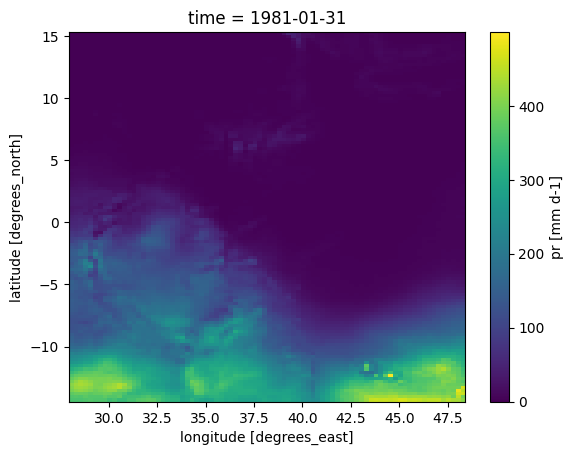

In [238]:
pr_monthly_mean[0,:,:].plot()

### Plot Monthly Rainfall

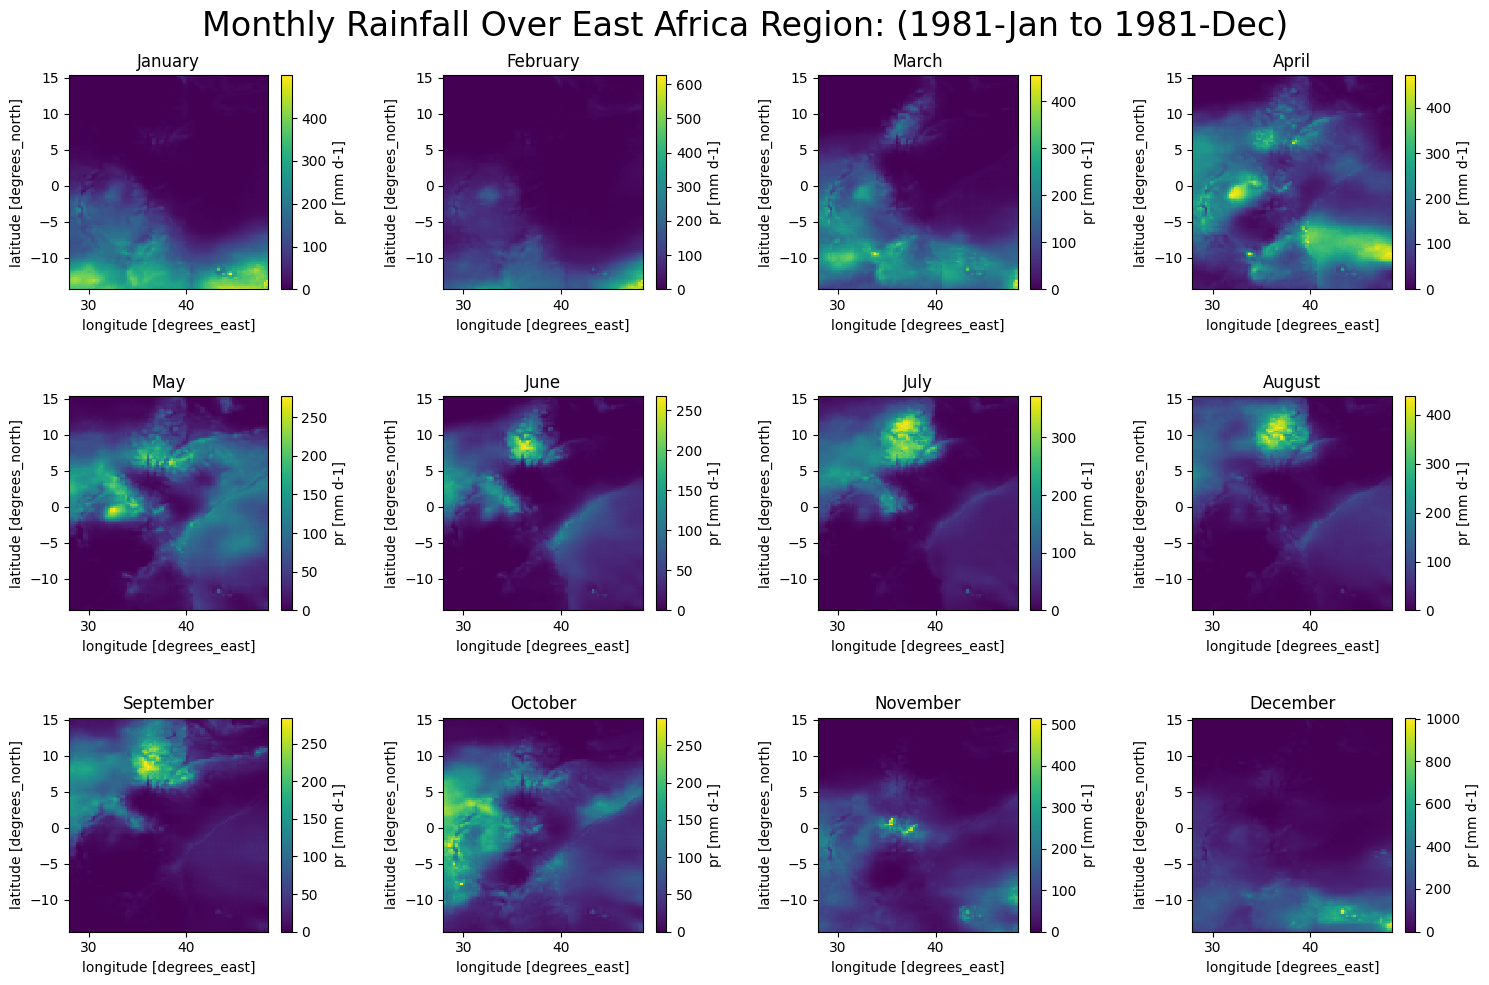

In [239]:
# Select the data for the first year (assuming 12 months in a year)
pr_first_year = pr_monthly_mean.isel(time=slice(0, 12))

# Get the number of months
num_months = len(pr_first_year.time)

# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
               'September', 'October', 'November', 'December']

# Create a figure with 12 subplots (3 rows x 4 columns)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array
axs = axs.ravel()

# Loop over the months
for i in range(num_months):
    # Select the data for the current month
    data = pr_first_year.isel(time=i)
    
    # Plot the data on the current subplot
    data.plot(ax=axs[i])
    
    # Set the title for the current subplot
    axs[i].set_title(month_names[i])
    
fig.suptitle('Monthly Rainfall Over East Africa Region: (1981-Jan to 1981-Dec)', fontsize=24)

# Adjust the layout
plt.tight_layout()

# Increase the space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### Calculate monthly average rainfall


In [240]:
pr_nor_mon_means = pr_monthly_mean.groupby(pr_monthly_mean.time.dt.month).mean()
pr_nor_mon_means

<xarray.DataArray 'pr' (month: 12, lat: 119, lon: 82)> Size: 468kB
array([[[2.44773071e+02, 2.46493332e+02, 2.51696686e+02, ...,
         4.30111725e+02, 4.42277344e+02, 4.29877563e+02],
        [2.58957458e+02, 2.61097046e+02, 2.60680420e+02, ...,
         3.91401947e+02, 4.57232819e+02, 4.13569702e+02],
        [2.71618042e+02, 2.77162415e+02, 2.78429779e+02, ...,
         3.98266968e+02, 4.71002716e+02, 4.76242340e+02],
        ...,
        [9.44920480e-02, 1.08926706e-01, 5.22789694e-02, ...,
         2.19536424e+00, 3.15594101e+00, 3.24456120e+00],
        [1.92822650e-01, 2.09047213e-01, 1.82463542e-01, ...,
         4.72082138e+00, 3.99857998e+00, 3.84997296e+00],
        [1.92081690e-01, 8.75668451e-02, 1.46933153e-01, ...,
         5.24839544e+00, 3.29077315e+00, 3.23743010e+00]],

       [[1.71522217e+02, 1.70870056e+02, 1.69790359e+02, ...,
         3.68845306e+02, 3.72613068e+02, 3.66935791e+02],
        [1.83936142e+02, 1.80047394e+02, 1.81379242e+02, ...,
         3.40494873e+02, 3.81663177e+02, 3.58382690e+02],
        [1.89157959e+02, 1.91705643e+02, 1.94511765e+02, ...,
         3.32282501e+02, 3.94259918e+02, 4.14469086e+02],
...
        [2.69740880e-01, 3.31102729e-01, 4.94339496e-01, ...,
         2.07322001e+00, 3.36000133e+00, 4.00639248e+00],
        [1.16219938e-01, 1.54275790e-01, 2.35622436e-01, ...,
         1.27777982e+00, 1.26695824e+00, 1.22626519e+00],
        [1.84478208e-01, 1.36785507e-01, 2.47630909e-01, ...,
         4.01226997e-01, 2.92795151e-01, 2.22758383e-01]],

       [[2.31222565e+02, 2.33398499e+02, 2.32750366e+02, ...,
         2.84623657e+02, 3.14251129e+02, 3.35401276e+02],
        [2.42497238e+02, 2.48002991e+02, 2.48364716e+02, ...,
         2.46191925e+02, 3.29536377e+02, 3.23158234e+02],
        [2.54013702e+02, 2.56505646e+02, 2.58116638e+02, ...,
         2.60509216e+02, 3.45213379e+02, 3.62443542e+02],
        ...,
        [1.07266687e-01, 1.02022901e-01, 1.14813045e-01, ...,
         1.67055559e+00, 2.97727919e+00, 2.58001208e+00],
        [5.66668948e-03, 8.07444677e-02, 8.47778767e-02, ...,
         9.95351017e-01, 1.10430801e+00, 1.03422081e+00],
        [2.59120273e-03, 1.45180553e-01, 1.83120117e-01, ...,
         2.39667916e+00, 1.76594388e+00, 8.66762400e-01]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2
  * month    (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Attributes:
    units:         mm d-1
    cell_methods:  time: mean

### Plot monthly average rainfall

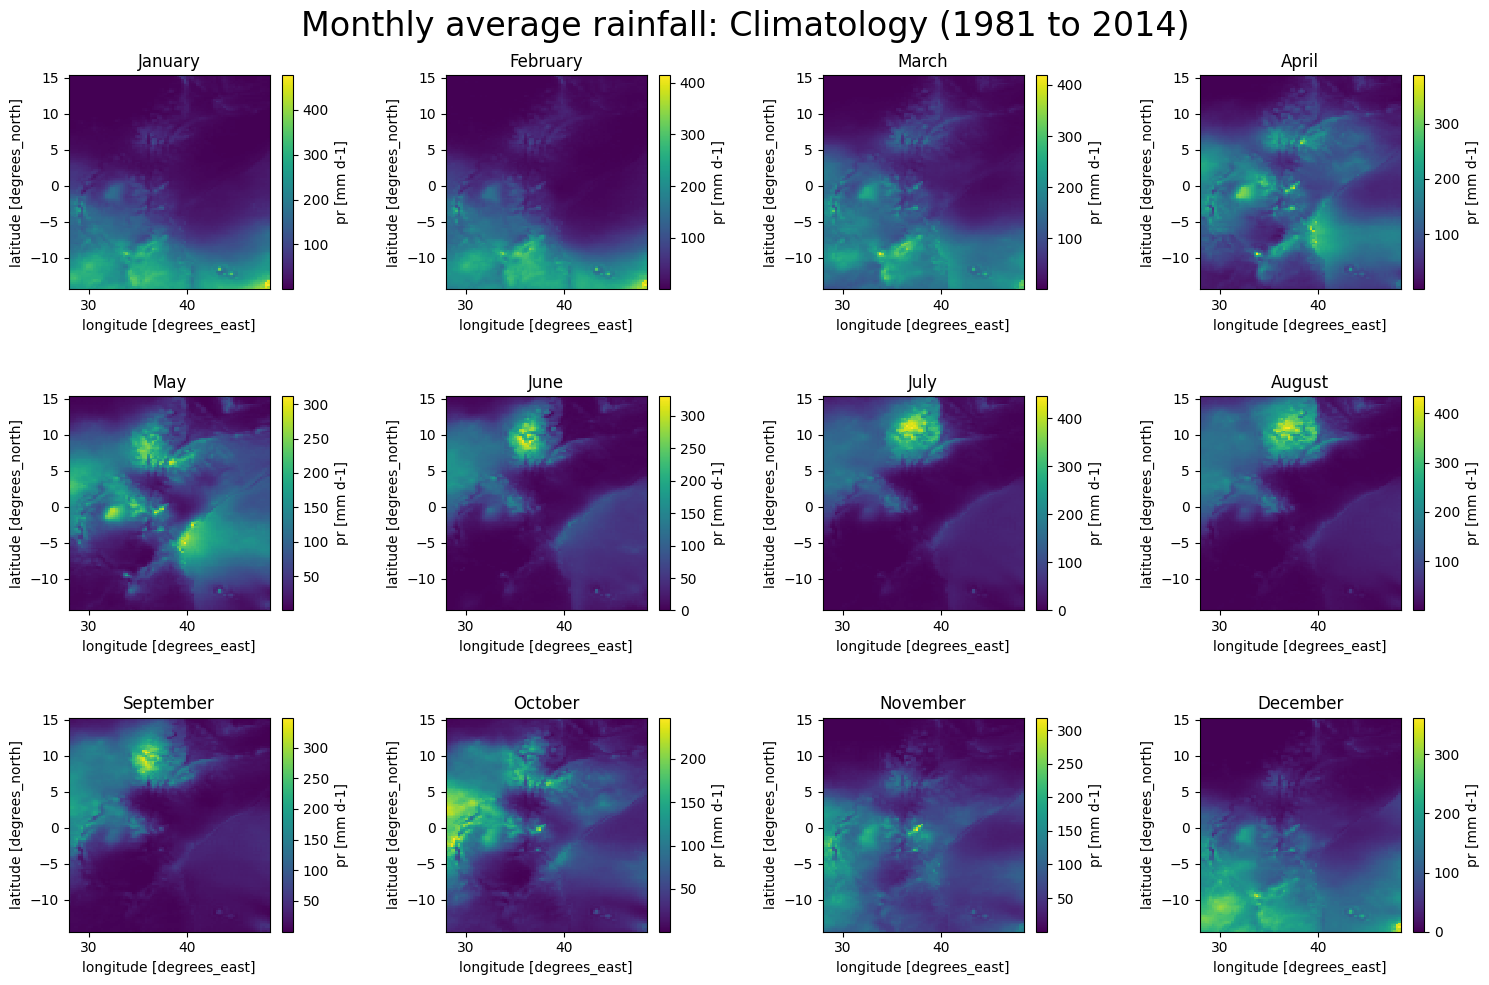

In [241]:
# Get the number of months
num_months = len(pr_nor_mon_means.month)

# Create a list of month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']

# Create a figure with 12 subplots (3 rows x 4 columns)
fig, axs = plt.subplots(3, 4, figsize=(15, 10))

# Flatten the axes array
axs = axs.ravel()

# Loop over the months
for i in range(num_months):
    # Select the data for the current month
    data = pr_nor_mon_means.isel(month=i)
    
    # Plot the data on the current subplot
    data.plot(ax=axs[i])
    
    # Set the title for the current subplot
    axs[i].set_title(month_names[i])
    
    # Set the title for the whole plot
fig.suptitle('Monthly average rainfall: Climatology (1981 to 2014)', fontsize=24)

# Adjust the layout
plt.tight_layout()

# Increase the space between subplots
plt.subplots_adjust(hspace=0.5, wspace=0.5)

### Annual total rainfall

In [242]:
# the annual total rainfall over the region
pr_nor_annual_total = ds_ref_nor['pr'].resample(time='1YE').sum()
pr_nor_annual_total

<xarray.DataArray 'pr' (time: 34, lat: 119, lon: 82)> Size: 1MB
array([[[ 982.0233  ,  984.43274 ,  981.32196 , ..., 2214.3625  ,
         2291.1729  , 2360.8972  ],
        [1040.6146  , 1039.607   , 1025.7491  , ..., 2110.499   ,
         2515.0032  , 2388.691   ],
        [1093.0017  , 1098.8627  , 1089.9445  , ..., 2243.9343  ,
         2701.1484  , 2857.8665  ],
        ...,
        [  97.59473 ,   91.19703 ,   88.19683 , ...,   42.356075,
           52.07734 ,   61.203266],
        [  87.87353 ,   88.81277 ,   87.383385, ...,   41.77669 ,
           40.6993  ,   40.24473 ],
        [  69.48049 ,   68.626144,   70.51609 , ...,   28.473175,
           28.251293,   26.412024]],

       [[ 971.68445 ,  984.3555  ,  989.837   , ..., 1882.9425  ,
         1963.642   , 2093.599   ],
        [1096.5363  , 1078.9908  , 1093.6111  , ..., 1809.816   ,
         2149.478   , 2038.8881  ],
        [1191.779   , 1221.5809  , 1202.8643  , ..., 1908.5276  ,
         2317.2307  , 2380.2148  ],
...
        [ 119.62594 ,  113.301025,  110.14264 , ...,   55.120476,
           70.59321 ,   77.29706 ],
        [  95.410255,   92.48729 ,   87.86948 , ...,   51.534847,
           49.957626,   47.14141 ],
        [  62.465508,   63.102436,   63.283405, ...,   78.529175,
           57.27444 ,   33.110867]],

       [[ 952.6187  ,  940.9895  ,  936.523   , ..., 1584.1244  ,
         1645.6621  , 1669.0541  ],
        [1046.0688  , 1032.3213  , 1032.2932  , ..., 1451.0563  ,
         1720.1163  , 1624.9022  ],
        [1124.5889  , 1130.7095  , 1138.6722  , ..., 1460.1172  ,
         1730.5254  , 1847.6158  ],
        ...,
        [  51.081192,   52.080517,   51.58914 , ...,   76.984215,
           94.21185 ,  104.06291 ],
        [  43.05427 ,   42.51912 ,   37.29564 , ...,   90.80964 ,
           89.44643 ,   81.007515],
        [  25.315882,   27.429977,   29.510815, ...,   91.82087 ,
           72.77001 ,   69.197044]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2
  * time     (time) datetime64[ns] 272B 1981-12-31 1982-12-31 ... 2014-12-31
Attributes:
    units:         mm d-1
    cell_methods:  time: mean

### Plot annual total rainfall

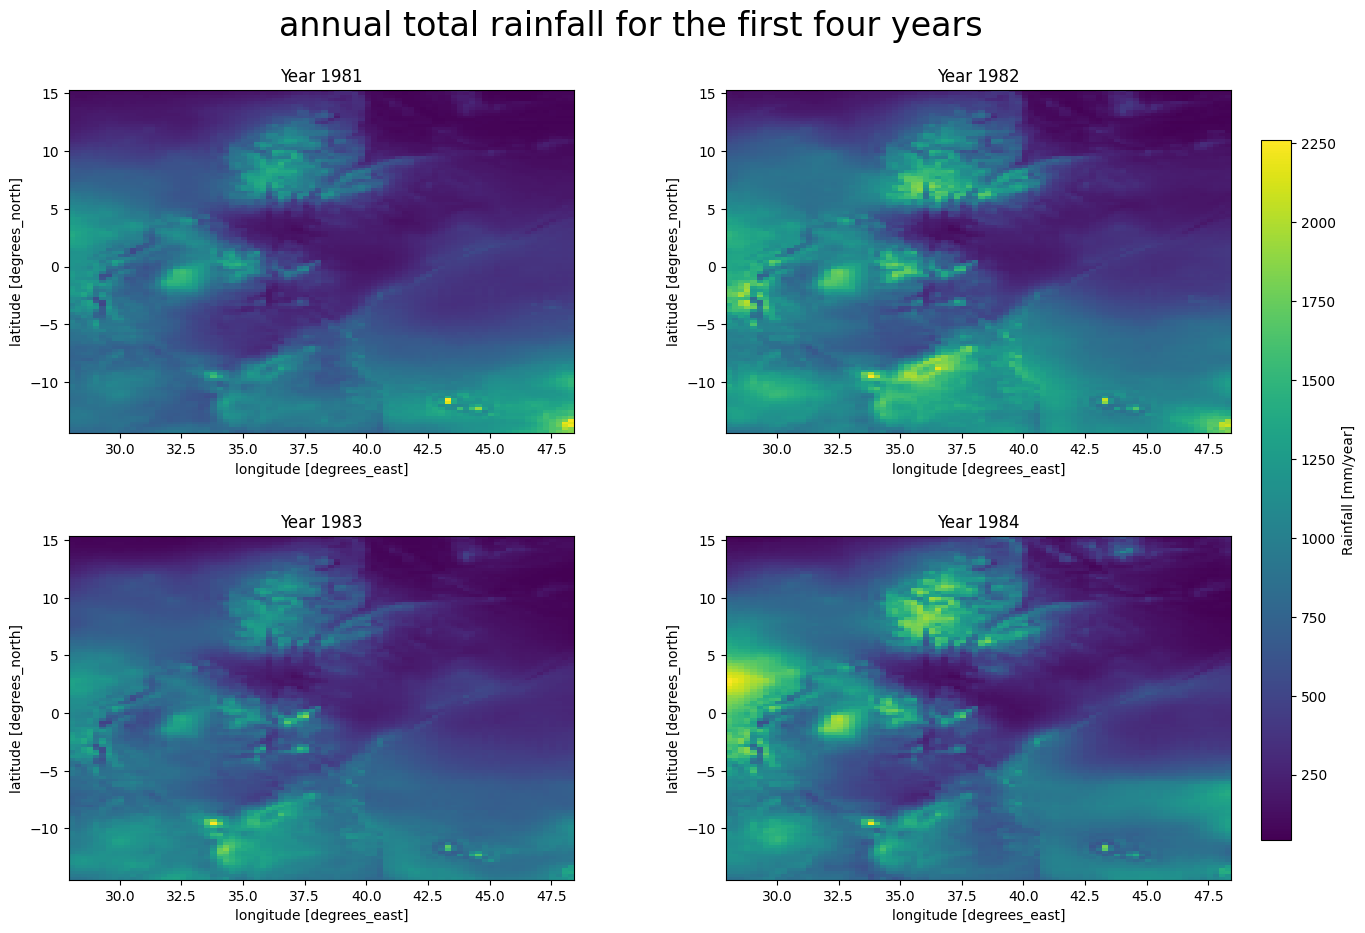

In [243]:
# Select the data for the first four years
rf_first_four_years = pr_nor_annual_total.isel(time=slice(0, 4))

# Get the number of years
num_years = len(rf_first_four_years.time)

# Define the starting year
start_year = 1981

# Create a figure with 4 subplots (2 rows x 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array
axs = axs.ravel()

# Loop over the years
for i in range(num_years):
    # Select the data for the current year
    data = rf_first_four_years.isel(time=i)
    
    # Plot the data on the current subplot
    img = data.plot(ax=axs[i], add_colorbar=False)

    # Set the title for the current subplot to the actual year
    axs[i].set_title(f'Year {start_year + i}')

# Set the title for the whole plot
fig.suptitle('annual total rainfall for the first four years', fontsize=24)

# Create a new axes for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Create a colorbar in the new axes
fig.colorbar(img, cax=cbar_ax, 
             label='Rainfall [mm/year]',
             orientation='vertical',
             fraction=0.020,
             pad=0.02,
             aspect=15,
             shrink=0.6,
             extend='neither')

# Increase the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)

### Seasonal total rainfall

In [244]:
# Resample data to monthly sum
pr_monthly_ds = ds_ref_nor.resample(time='1MS').sum()

# Create a new coordinate 'year' based on time
pr_monthly_ds['year'] = pr_monthly_ds['time.year']

# Create a new coordinate 'month' based on time
pr_monthly_ds['month'] = pr_monthly_ds['time.month']

In [245]:
pr_monthly_ds

<xarray.Dataset> Size: 16MB
Dimensions:  (time: 408, lat: 119, lon: 82)
Coordinates:
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2
  * time     (time) datetime64[ns] 3kB 1981-01-01 1981-02-01 ... 2014-12-01
Data variables:
    pr       (time, lat, lon) float32 16MB 355.4 355.5 356.4 ... 0.0 0.0 0.0
    year     (time) int64 3kB 1981 1981 1981 1981 1981 ... 2014 2014 2014 2014
    month    (time) int64 3kB 1 2 3 4 5 6 7 8 9 10 11 ... 3 4 5 6 7 8 9 10 11 12
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 17:20:36 2023: cdo -z zip_5 -sellonlatbox,28,48....
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

In [246]:
# Calculate seasonal total (FMAM, JJAS, ONDJ)
pr_belg_ds = pr_monthly_ds.where(pr_monthly_ds['month'].isin([2, 3, 4, 5]), drop=True).groupby('year').sum('time')
pr_kiremt_ds = pr_monthly_ds.where(pr_monthly_ds['month'].isin([6, 7, 8, 9]), drop=True).groupby('year').sum('time')
pr_bega_ds = pr_monthly_ds.where(pr_monthly_ds['month'].isin([10, 11, 12, 1]), drop=True).groupby('year').sum('time')

In [247]:
eto_belg_ds

<xarray.Dataset> Size: 1MB
Dimensions:  (year: 34, lat: 119, lon: 82)
Coordinates:
  * year     (year) float64 272B 1.981e+03 1.982e+03 ... 2.013e+03 2.014e+03
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2
Data variables:
    pr       (year, lat, lon) float32 1MB 289.4 287.9 284.1 ... 22.42 23.63
    month    (year) float64 272B 14.0 14.0 14.0 14.0 ... 14.0 14.0 14.0 14.0
Attributes:
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.6
    history:      Thu Dec 21 17:20:36 2023: cdo -z zip_5 -sellonlatbox,28,48....
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...

### Plot for the Seasonal (FMAM) total rainfall for the first four years


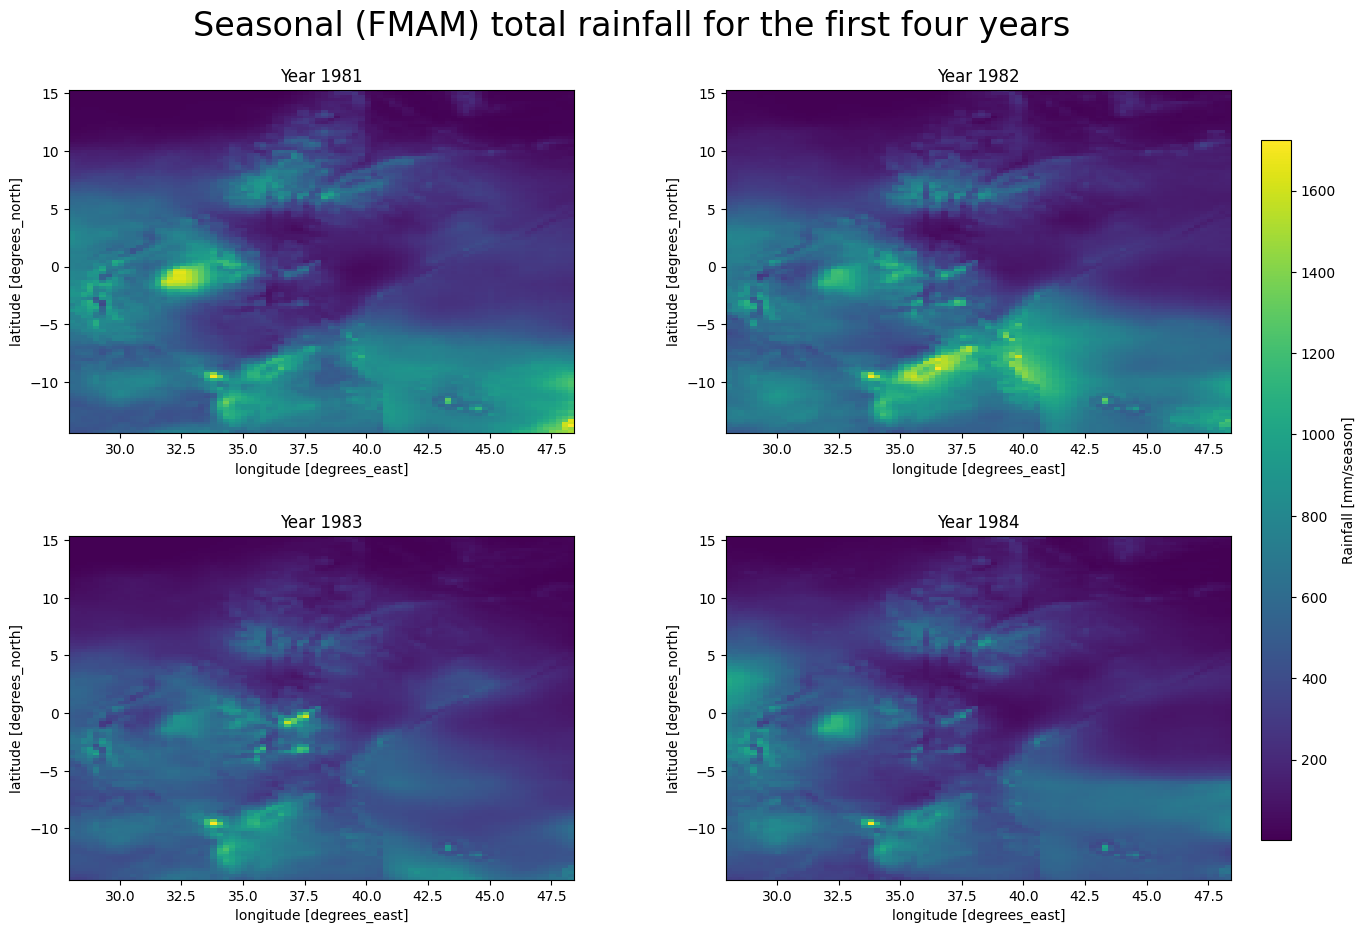

In [248]:
# Select the data for the first four years
pr_first_four_years = pr_belg_ds.isel(year=slice(0, 4))

# Get the number of years
num_years = len(pr_first_four_years.year)

# Define the starting year
start_year = 1981

# Create a figure with 4 subplots (2 rows x 2 columns)
fig, axs = plt.subplots(2, 2, figsize=(15, 10))

# Flatten the axes array
axs = axs.ravel()

# Loop over the years
for i in range(num_years):
    # Select the data for the current year
    data = pr_first_four_years.isel(year=i)
    
    # Plot the data on the current subplot
    img = data.pr.plot(ax=axs[i], add_colorbar=False)

    # Set the title for the current subplot to the actual year
    axs[i].set_title(f'Year {start_year + i}')

# Set the title for the whole plot
fig.suptitle('Seasonal (FMAM) total rainfall for the first four years', fontsize=24)

# Create a new axes for the colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.02, 0.7])

# Create a colorbar in the new axes
fig.colorbar(img, cax=cbar_ax, 
             label='Rainfall [mm/season]',
             orientation='vertical',
             fraction=0.020,
             pad=0.02,
             aspect=15,
             shrink=0.6,
             extend='neither')

# Increase the space between subplots
plt.subplots_adjust(hspace=0.3, wspace=0.3, top=0.9)

### Calculate long term sasonal mean rainfall [1981 -2014]


In [249]:
mean_pr_belg_ds = pr_belg_ds.mean('year').pr
mean_pr_kiremt_ds = pr_kiremt_ds.mean('year').pr   
mean_pr_bega_ds = eto_bega_ds.mean('year').pr

In [250]:
mean_pr_belg_ds

<xarray.DataArray 'pr' (lat: 119, lon: 82)> Size: 39kB
array([[300.3594   , 296.76886  , 295.11554  , ..., 746.999    ,
        797.55457  , 825.61163  ],
       [334.1614   , 319.7533   , 319.89114  , ..., 697.9577   ,
        847.77704  , 804.9513   ],
       [349.2571   , 350.27167  , 349.16934  , ..., 717.1905   ,
        895.62933  , 941.3784   ],
       ...,
       [  3.3449085,   3.0776844,   2.8339596, ...,  29.660236 ,
         34.22199  ,  39.263668 ],
       [  2.8201673,   2.7664673,   2.677497 , ...,  33.002205 ,
         30.752373 ,  32.13543  ],
       [  2.349989 ,   2.1325128,   1.9792166, ...,  30.305862 ,
         28.200401 ,  27.181679 ]], dtype=float32)
Coordinates:
  * lon      (lon) float64 656B 28.05 28.3 28.55 28.8 ... 47.55 47.8 48.05 48.3
  * lat      (lat) float64 952B -14.3 -14.05 -13.8 -13.55 ... 14.7 14.95 15.2

### Plot for long term seasonal mean rainfall [1981 - 2014]

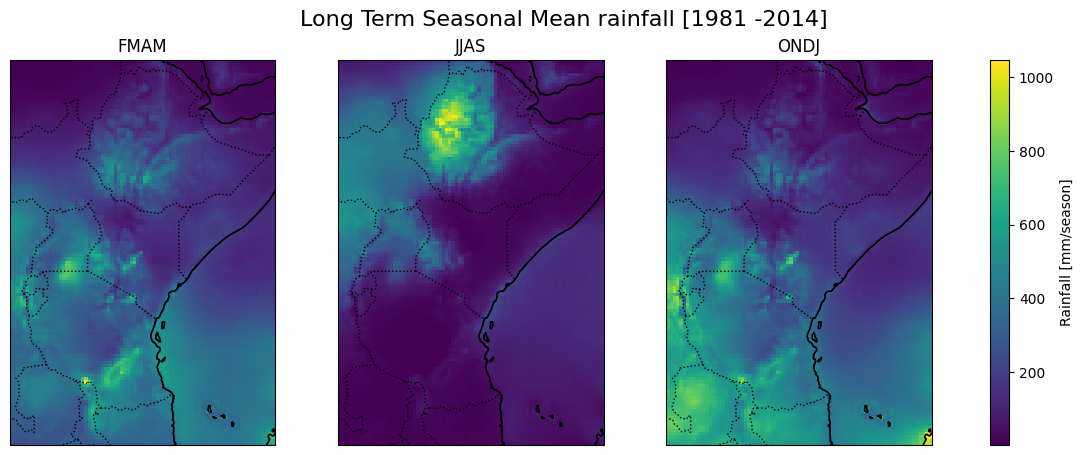

In [251]:
fig, axs = plt.subplots(1, 3, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(15, 5))

# Define labels for subplots
season_labels = ['FMAM', 'JJAS', 'ONDJ']


for i, ds in enumerate([mean_pr_belg_ds, mean_pr_kiremt_ds, mean_pr_bega_ds]):
    ax = axs[i]
    pcm = ds.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='viridis', add_colorbar=False)
    ax.coastlines()
    
    # Set title for each subplot
    ax.set_title(season_labels[i])
    
    # Add country borders, coastlines, and oceans
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE, linestyle='-', linewidth=1, edgecolor='black')
    ax.add_feature(cfeature.OCEAN, color='lightblue')
    



# Add color bar with modified label
cbar = fig.colorbar(pcm, ax=axs, orientation='vertical', label='Rainfall [mm/season]')


plt.suptitle("Long Term Seasonal Mean rainfall [1981 -2014]", fontsize=16)

plt.show()


## Masking Netcdf file

### Method-1: salem Installation
`pip install salem`

`conda install -c oggm salem`

In [252]:
# Importing Libraries

import salem

In [253]:
# Load the data with salem package
surface_rain = salem.open_xr_dataset('tamsat_2019_june.nc')
surface_rain

<xarray.Dataset> Size: 521kB
Dimensions:  (time: 1, lon: 401, lat: 321)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-01
  * lon      (lon) float64 3kB 33.0 33.04 33.08 33.11 ... 47.89 47.92 47.96 48.0
  * lat      (lat) float64 3kB 15.0 14.96 14.93 14.89 ... 3.113 3.075 3.037 3.0
Data variables:
    rfe      (time, lat, lon) float32 515kB ...
Attributes: (12/14)
    CDI:          Climate Data Interface version 2.0.5 (https://mpimet.mpg.de...
    Conventions:  CF-1.5
    institution:  TAMSAT Research Group, Meteorology Department, University o...
    title:        TAMSAT Rain Fall Estimate (RFE)
    contact:      tamsat@reading.ac.uk
    history:      Sun Oct 02 19:59:08 2022: cdo enssum rfe2019_06-dk1.v3.nc r...
    ...           ...
    lonmin:       33.0
    lonmax:       48.0
    latres:       0.0375
    lonres:       0.0375
    CDO:          Climate Data Operators version 2.0.5 (https://mpimet.mpg.de...
    pyproj_srs:   +proj=longlat +datum=WGS84 +no_defs

### Make a quick plots

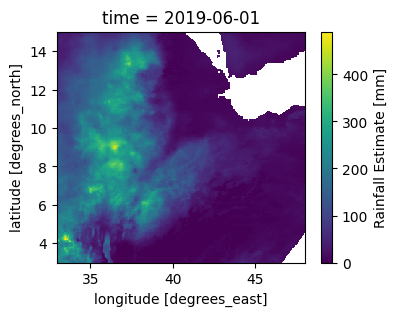

In [254]:
surface_rain.rfe.plot(size=3)


### Check Projction

In [255]:
surface_rain.pyproj_srs

'+proj=longlat +datum=WGS84 +no_defs'

### Subsetting Netcdf file

In [256]:
## Loading shapefile & extracting Ethiopian region
shp_world = salem.read_shapefile(salem.get_demo_file('world_borders.shp'))
# shp_world

### Plot the shapefile 

<Axes: >

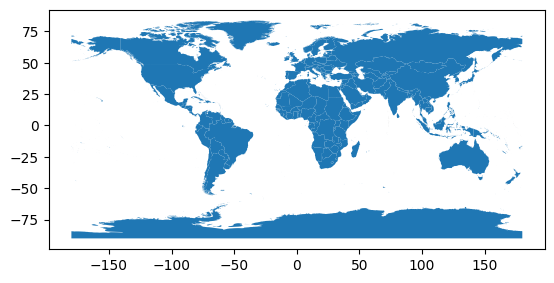

In [257]:
shp_world.plot()

### Select region of interest

In [258]:
shp_ethio = shp_world.loc[shp_world['CNTRY_NAME'] == 'Ethiopia'] 
shp_ethio

,CAT,FIPS_CNTRY,CNTRY_NAME,AREA,POP_CNTRY,geometry,min_x,max_x,min_y,max_y
1335,68,ET,Ethiopia,1127127.0,67851281.0,"POLYGON ((36.54282 14.26205, 36.55333 14.28333...",32.991104,47.988243,3.406389,14.88361


<Axes: >

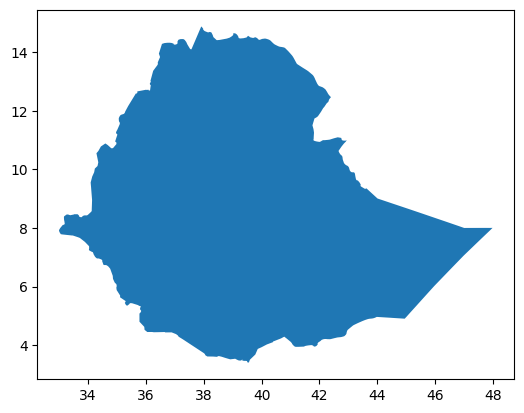

In [259]:
shp_ethio.plot()

### Subsetting Netcdf within region of interest (Ethiopia)

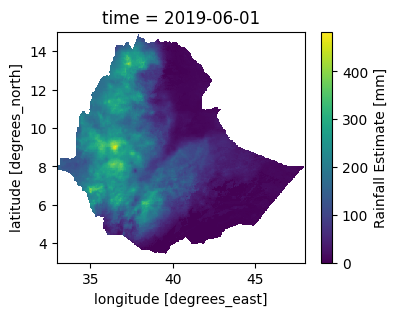

In [260]:
# Get the varaible name
rfe = surface_rain.rfe

# Clip the data to the shapefile
rfe_et = rfe.salem.roi(shape=shp_ethio)

# Plot the clipped data
rfe_et.plot(size=3)

## Saving data to netCDF

In [261]:
air_temp.to_netcdf('tsa.nc')

# air_temp.to_netcdf('tas_compressed.nc', encoding=air_temp.encoding.update({'zlib': True, 'complevel': 4}))

### Method 2: Masking Netcdf (regionmask)

#### Dowload and Adding the shapefile

In [262]:
# Define the URL of the shapefile
# url_et = 'https://biogeo.ucdavis.edu/data/gadm3.6/shp/gadm36_ETH_shp.zip'
url_et = 'https://geodata.ucdavis.edu/gadm/gadm3.6/shp/gadm36_ETH_shp.zip'

In [263]:
# Download the shapefile
wget.download(url_et, 'ethiopia.zip')

'ethiopia (1).zip'

### Extract the zip files

In [264]:
# Specify the zip file name
zip_file_ethiopia = 'ethiopia.zip'

# Specify the directory to unzip to
unzip_dir = 'ethiopia'

# Create a ZipFile object
with zipfile.ZipFile(zip_file_ethiopia, 'r') as zip_ref:
    # Extract all the contents of the zip file into the specified directory
    zip_ref.extractall(unzip_dir)

In [265]:
# Load the shapefile into a GeoDataFrame
ethiopia = gpd.read_file('ethiopia/gadm36_ETH_0.shp')

In [266]:
ethiopia

,GID_0,NAME_0,geometry
0,ETH,Ethiopia,"POLYGON ((38.75982 3.55447, 38.74260 3.55950, ..."


<Axes: >

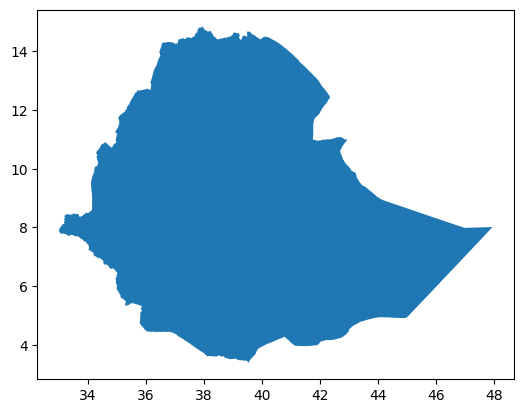

In [267]:
ethiopia.plot()

In [268]:
# Export the GeoDataFrame as a shapefile
ethiopia.to_file('et_region.shp')

In [269]:
# convert the geometry column to a list
ethiopia_geometry_list = ethiopia.geometry.tolist()
ethiopia_geometry_list

[<POLYGON ((38.76 3.554, 38.743 3.56, 38.734 3.563, 38.729 3.564, 38.724 3.56...>]

In [270]:
# Create the regionmask.Regions object using the list
et_poly = regionmask.Regions(ethiopia_geometry_list)
et_poly

<regionmask.Regions 'unnamed'>
overlap:  None

Regions:
0 r0 Region0

[1 regions]

In [271]:
# Mask the data using the regionmask object
et_mask = et_poly.mask(rfe.lon, rfe.lat)
#et_mask = et_poly.mask(rfe, lat_name= 'lat', lon_name='lon')

et_mask

<xarray.DataArray 'mask' (lat: 321, lon: 401)> Size: 1MB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 3kB 15.0 14.96 14.93 14.89 ... 3.113 3.075 3.037 3.0
  * lon      (lon) float64 3kB 33.0 33.04 33.08 33.11 ... 47.89 47.92 47.96 48.0
Attributes:
    standard_name:  region
    flag_values:    [0]
    flag_meanings:  r0

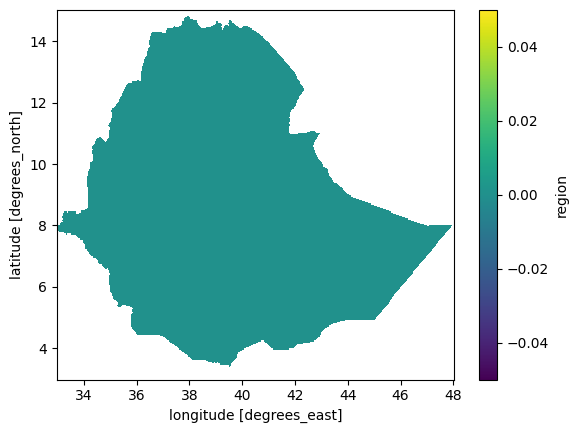

In [272]:
et_mask.plot()

In [273]:
# Clip the netCDF file by the shapefile
et_mask_rf =  rfe.where(et_mask == 0)
et_mask_rf

<xarray.DataArray 'rfe' (time: 1, lat: 321, lon: 401)> Size: 515kB
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 8B 2019-06-01
  * lon      (lon) float64 3kB 33.0 33.04 33.08 33.11 ... 47.89 47.92 47.96 48.0
  * lat      (lat) float64 3kB 15.0 14.96 14.93 14.89 ... 3.113 3.075 3.037 3.0
Attributes:
    long_name:   Rainfall Estimate
    units:       mm
    short_name:  rfe
    pyproj_srs:  +proj=longlat +datum=WGS84 +no_defs

### Plot the cliped netCDF

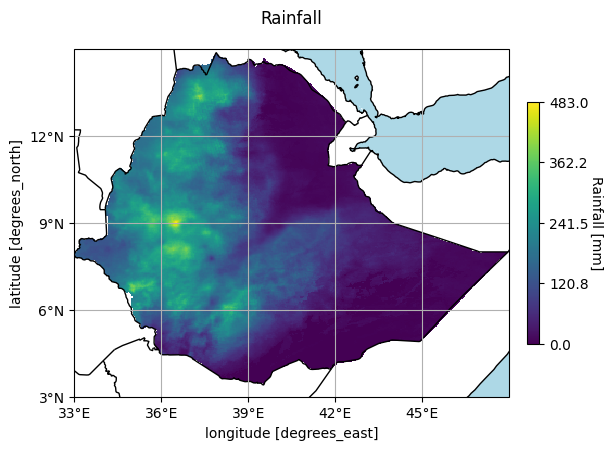

In [274]:
longitude_min = 33
longitude_max = 48
latitude_min = 3
latitude_max = 15


min_value = et_mask_rf[0,:,:].min().values
max_value = et_mask_rf[0,:,:].max().values
num_ticks = 5

# Create a GeoAxes object
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(projection=ccrs.PlateCarree()))

# Set the extent of the plot to the coordinates of the region you want to zoom into
# The format is [longitude_min, longitude_max, latitude_min, latitude_max]
ax.set_extent([longitude_min, longitude_max, latitude_min, latitude_max])

# Add country borders
ax.add_feature(cfeature.BORDERS, edgecolor='black')

# Add coastlines
ax.add_feature(cfeature.COASTLINE, edgecolor='black')

# Add oceans
ax.add_feature(cfeature.OCEAN, facecolor='lightblue')


# Add gridlines and labels
gl = ax.gridlines(draw_labels=False)
gl.xlocator = mticker.FixedLocator(range(longitude_min, longitude_max, 3)) 
gl.ylocator = mticker.FixedLocator(range(latitude_min, latitude_max, 3))  

# Manually set x and y labels
ax.set_xticks(range(longitude_min, longitude_max, 3), crs=ccrs.PlateCarree())  
ax.set_yticks(range(latitude_min, latitude_max, 3), crs=ccrs.PlateCarree())  
ax.xaxis.set_major_formatter(LONGITUDE_FORMATTER)
ax.yaxis.set_major_formatter(LATITUDE_FORMATTER)

# Plot the data and get the returned object
img = et_mask_rf[0,:,:].plot(ax=ax, add_colorbar=False)


# Add a colorbar
cbar = plt.colorbar(img, ax=ax, orientation='vertical',  fraction=0.026, pad=0.04)
# Add a label to the colorbar
cbar.set_label('Rainfall [mm]', rotation=270, labelpad=10, fontsize=10)



# Set equal tick labels on the colorbar
ticks = np.linspace(min_value, max_value, num_ticks)
cbar.set_ticks(ticks)


# Add a title
ax.set_title('Rainfall', fontsize=12, y=1.05)

plt.show()

## Write netCDF  file Xarray

In [275]:
# Creating Numpy arrays for Data variables
lats = np.arange(3, 16, 0.5)
lons = np.arange(33, 49, 0.5)

In [276]:
# Create a 2D array of random numbers
data = np.random.rand(len(lats), len(lons))

### Write xarray dataset

In [277]:
surf_dataset = xr.Dataset( data_vars= {'surf_data':(('lats', 'lons'), 
                                                    data)},
                          coords={'lat':lats, 'lon':lons, })

In [278]:
surf_dataset

<xarray.Dataset> Size: 7kB
Dimensions:    (lats: 26, lons: 32, lat: 26, lon: 32)
Coordinates:
  * lat        (lat) float64 208B 3.0 3.5 4.0 4.5 5.0 ... 14.0 14.5 15.0 15.5
  * lon        (lon) float64 256B 33.0 33.5 34.0 34.5 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: lats, lons
Data variables:
    surf_data  (lats, lons) float64 7kB 0.8015 0.1519 0.579 ... 0.214 0.7184

### Assign attribute information

In [279]:
# Add attributes to the Latitude 
surf_dataset.lat.attrs['units'] = 'degrees_north'
surf_dataset.lat.attrs['standard_name'] = 'latitude'
surf_dataset.lat.attrs['long_name'] = 'latitude coordinate'
surf_dataset.lat.attrs['axis'] = 'Y'
surf_dataset

<xarray.Dataset> Size: 7kB
Dimensions:    (lats: 26, lons: 32, lat: 26, lon: 32)
Coordinates:
  * lat        (lat) float64 208B 3.0 3.5 4.0 4.5 5.0 ... 14.0 14.5 15.0 15.5
  * lon        (lon) float64 256B 33.0 33.5 34.0 34.5 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: lats, lons
Data variables:
    surf_data  (lats, lons) float64 7kB 0.8015 0.1519 0.579 ... 0.214 0.7184

In [280]:
# Add attributes to the longitude coordinate
surf_dataset.lon.attrs['units'] = 'degrees_east'
surf_dataset.lon.attrs['standard_name'] = 'longitude'
surf_dataset.lon.attrs['long_name'] = 'longitude coordinate'
surf_dataset.lon.attrs['axis'] = 'X'

surf_dataset

<xarray.Dataset> Size: 7kB
Dimensions:    (lats: 26, lons: 32, lat: 26, lon: 32)
Coordinates:
  * lat        (lat) float64 208B 3.0 3.5 4.0 4.5 5.0 ... 14.0 14.5 15.0 15.5
  * lon        (lon) float64 256B 33.0 33.5 34.0 34.5 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: lats, lons
Data variables:
    surf_data  (lats, lons) float64 7kB 0.8015 0.1519 0.579 ... 0.214 0.7184

In [281]:
# Assign attributes to the data variable
surf_dataset.surf_data.attrs['units'] = 'kg/m3'
surf_dataset.surf_data.attrs['long_name'] = 'organic matter'
surf_dataset.surf_data.attrs['standard_name'] = 'matter density '

surf_dataset

<xarray.Dataset> Size: 7kB
Dimensions:    (lats: 26, lons: 32, lat: 26, lon: 32)
Coordinates:
  * lat        (lat) float64 208B 3.0 3.5 4.0 4.5 5.0 ... 14.0 14.5 15.0 15.5
  * lon        (lon) float64 256B 33.0 33.5 34.0 34.5 ... 47.0 47.5 48.0 48.5
Dimensions without coordinates: lats, lons
Data variables:
    surf_data  (lats, lons) float64 7kB 0.8015 0.1519 0.579 ... 0.214 0.7184

### Saving xarray dataset as NetCDF format

In [282]:

surf_dataset.to_netcdf('surface_dataset.nc')